In [1]:
# prompt: connect to drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# !apt-get install tesseract-ocr
# !pip install pytesseract

In [ ]:
import cv2
import pytesseract
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
# Load the image
image_path = '/content/drive/My Drive/SRI/Images/Text2.png'
text_image = cv2.imread(image_path)

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(text_image, cv2.COLOR_BGR2GRAY)


# Use Tesseract to extract the text and bounding boxes
text = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)


# Get the number of words
n_boxes = len(text['text'])

# Create an empty array to store the word images
word_images = []

In [ ]:
# Loop through each word and extract the image
for i in range(n_boxes):
    if text['text'][i] != '':
        # Get the coordinates of the bounding box
        (x, y, w, h) = (text['left'][i], text['top'][i], text['width'][i], text['height'][i])

        # Extract the word image
        word_image = text_image[y:y+h, x:x+w]

        # Append the word image to the array
        word_images.append(word_image)

        # Draw the bounding box on the text image
        cv2.rectangle(text_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Plot the text image with bounding boxes
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(word_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

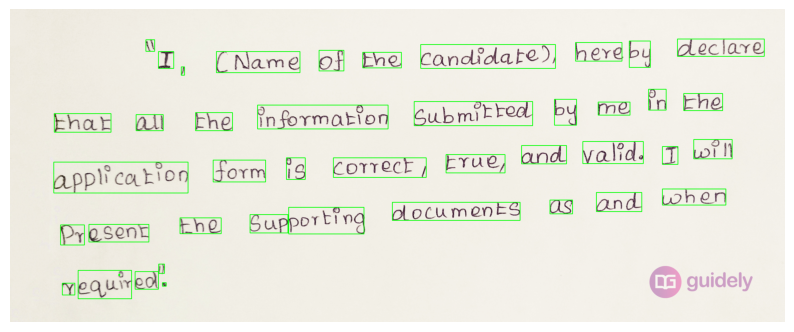

In [ ]:
# Plot the text image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(text_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
# Initialize an empty list to store the character arrays
character_arrays = []


In [ ]:
# Iterate over the word images
for word_image in word_images:
    # Use Tesseract to extract characters from the word image
    characters = pytesseract.image_to_boxes(word_image)

    # Split the characters string into individual lines
    lines = characters.split('\n')

    # Initialize an empty list to store the character coordinates
    char_coords = []

    # Iterate over the lines and extract the character coordinates
    for line in lines:
        if line.strip():
            char, x1, y1, x2, y2, _ = line.split()
            char_coords.append((char, int(x1), int(y1), int(x2), int(y2)))

    # Create a copy of the word image
    word_image_copy = word_image.copy()

    # Create a list to store the character images
    char_images = []

    # Iterate over the character coordinates and extract the character images
    for char, x1, y1, x2, y2 in char_coords:
        # Extract the character image
        char_image = word_image[y1:y2, x1:x2]

        # Append the character image to the list
        char_images.append(char_image)

        # Draw a bounding box around the character on the word image copy
        cv2.rectangle(word_image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Append the character array to the list
    character_arrays.append(char_images)


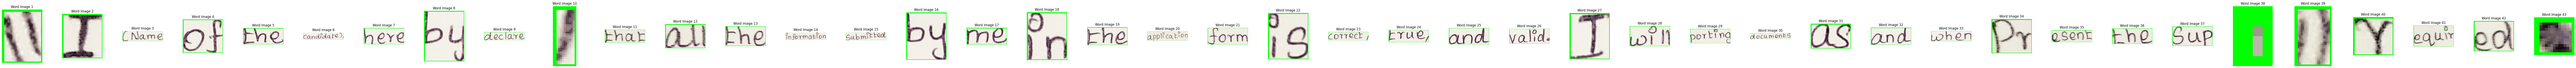

In [ ]:
# Create a figure with subplots for word images with character boxes
fig, axs = plt.subplots(1, len(word_images), figsize=(len(word_images) * 4, 4))

# Iterate over the word images and plot them with character boxes
for i, word_image in enumerate(word_images):
    # Plot the word image with character boxes
    axs[i].imshow(cv2.cvtColor(word_images[i], cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
    axs[i].set_title(f'Word Image {i+1}')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

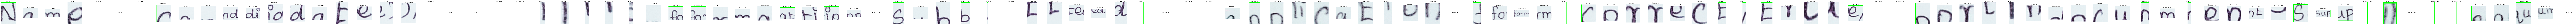

In [ ]:

# Create a figure with subplots for character images
fig, axs = plt.subplots(1, sum(len(char_images) for char_images in character_arrays), figsize=(sum(len(char_images) for char_images in character_arrays) * 4, 4))

# Iterate over the character arrays and plot the character images
char_index = 0
for char_images in character_arrays:
    for char_image in char_images:
        # Plot the character image
        axs[char_index].imshow(char_image, cmap='gray')
        axs[char_index].axis('off')
        axs[char_index].set_title(f'Character {char_index+1}')
        char_index += 1

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plots
plt.show()